In [61]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from data_preprocessing import IsriDataset
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import os
from sklearn.neighbors import NearestCentroid

#GA_SOLUTIONS_PATH = "IsriDataset.pkl"
GA_SOLUTIONS_PATH = "IsriDataset.pkl"

isri_dataset = pickle.load(open(GA_SOLUTIONS_PATH, 'rb'))

df = pd.DataFrame()
print(isri_dataset)
for i in range(len(isri_dataset.data['Jobdata'])):
    df_temp = pd.DataFrame.from_dict(isri_dataset.data['Jobdata'][i], orient='index')
    df = pd.concat([df, df_temp])

df[['time1','time2','time3','time4','time5','time6','time7','time8','time9','time10','time11','time12']] = pd.DataFrame(df.times.tolist(), index= df.index)
#print(df)
# 'time11',

df_cluster = df[['time1','time2','time3','time4','time5','time6','time7','time8','time9','time10', 'time11', 'time12']] #due_date
#df_cluster.to_excel('output.xlsx', index=False)
#pd.plotting.scatter_matrix(df_cluster, alpha=0.2, figsize=(15,15))
#plt.show()




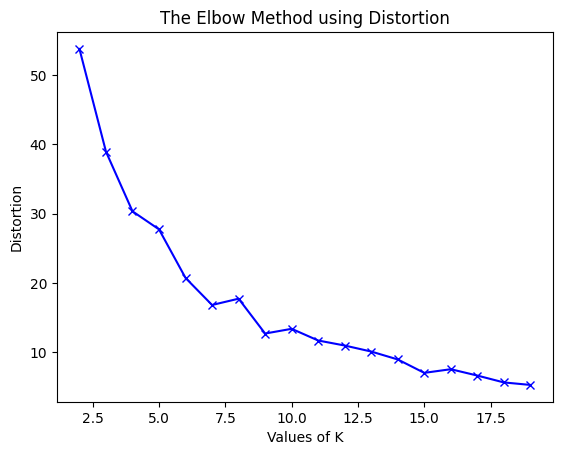

In [62]:

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 20)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_cluster)
    kmeanModel.fit(df_cluster)
 
    distortions.append(sum(np.min(cdist(df_cluster, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_cluster.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_cluster, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_cluster.shape[0]
    mapping2[k] = kmeanModel.inertia_


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


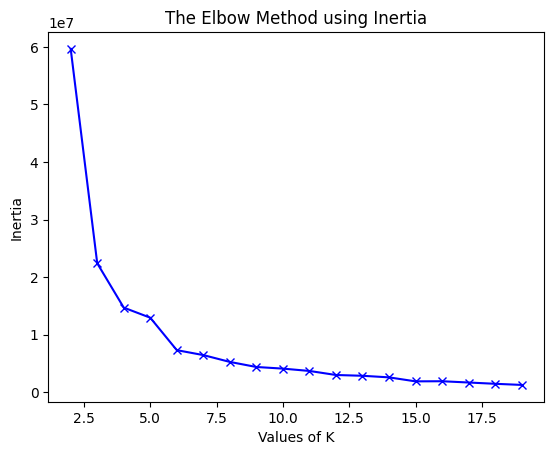

In [63]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [14]:
model = AgglomerativeClustering(n_clusters = 6)

y_means = model.fit_predict(df_cluster)


silhouette = silhouette_score(df_cluster, y_means)
print('Silhouette Score: ', silhouette )

davies_bouldin = davies_bouldin_score(df_cluster, y_means)
print('Davies Bouldin Score: ', davies_bouldin )




Silhouette Score:  0.6544129636604362
Davies Bouldin Score:  0.5645791402253509


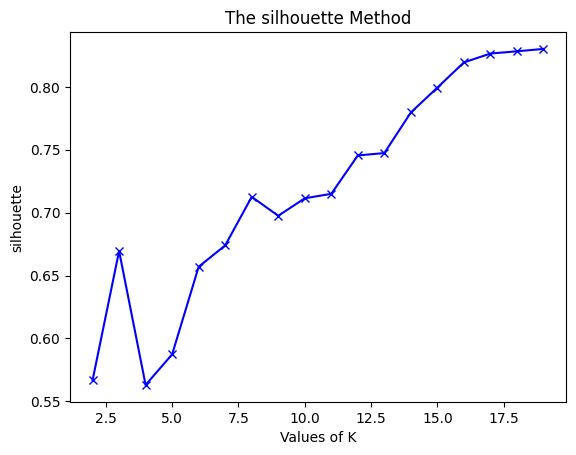

In [64]:


silhouette = []
davies_bouldin = []
distortions = []
K = range(2, 20)
 
for k in K:
    # Building and fitting the model
    model = AgglomerativeClustering(n_clusters = k)
    y_means = model.fit_predict(df_cluster)
 
    silhouette.append(silhouette_score(df_cluster, y_means))
    davies_bouldin.append(davies_bouldin_score(df_cluster, y_means))
    clf = NearestCentroid()
    clf.fit(df_cluster, y_means)

    distortions.append(sum(np.min(cdist(df_cluster, clf.centroids_,
                                        'euclidean'), axis=1)) / df_cluster.shape[0])
 


plt.plot(K, silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('silhouette')
plt.title('The silhouette Method')
plt.show()

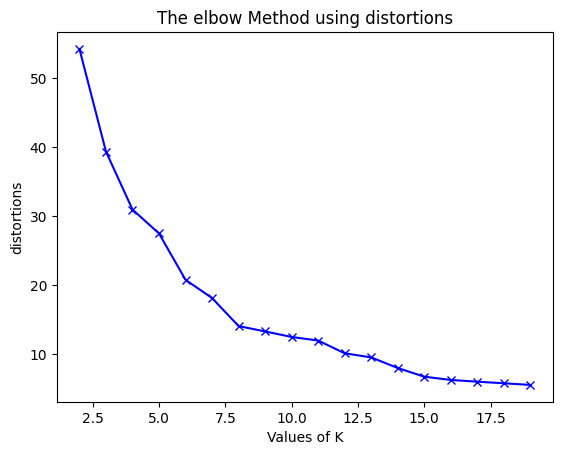

In [65]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('distortions')
plt.title('The elbow Method using distortions')
plt.show()

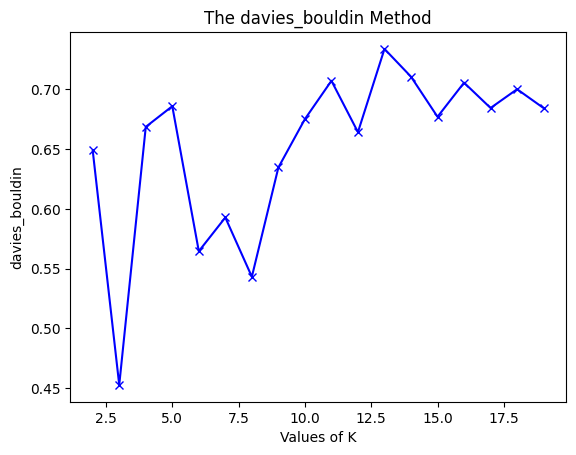

In [52]:
plt.plot(K, davies_bouldin, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('davies_bouldin')
plt.title('The davies_bouldin Method')
plt.show()

[[ 1.01520000e+02  9.34800000e+01  7.27800000e+01  3.55271368e-14
   7.46612701e+01  1.17400607e+02  9.86400000e+01  8.48580853e+01
   7.83351469e+01  9.85800000e+01  1.34843488e+02]
 [ 1.22160000e+02  1.01220000e+02  6.99000000e+01  9.08400000e+01
   1.13171150e+02  1.26066188e+02  9.86400000e+01  1.70002546e+02
   7.91822941e+01  1.03980000e+02  2.17175106e+02]
 [ 1.20935656e+02  3.16440000e+02  7.27800000e+01  4.26325641e-14
   1.83600000e+01  1.25125082e+02  9.86400000e+01  1.26079918e+02
   9.09000000e+01  9.85800000e+01  1.55787541e+02]
 [ 1.01520000e+02  9.34800000e+01  7.27252926e+01  5.32925764e-02
   7.46402620e+01  9.12771092e+01  6.89400000e+01  7.59205939e+01
   8.29190044e+01  9.85800000e+01  1.35404751e+02]
 [ 9.85648196e+01  9.34800000e+01  7.27993939e+01 -2.70006240e-13
   1.84840693e+01  9.41740260e+01  7.19211255e+01  7.76696104e+01
   8.21025685e+01  9.85800000e+01  1.35408975e+02]
 [ 1.08083868e+02  9.34800000e+01  7.32776514e+01 -3.55271368e-13
   7.24971394e+01  

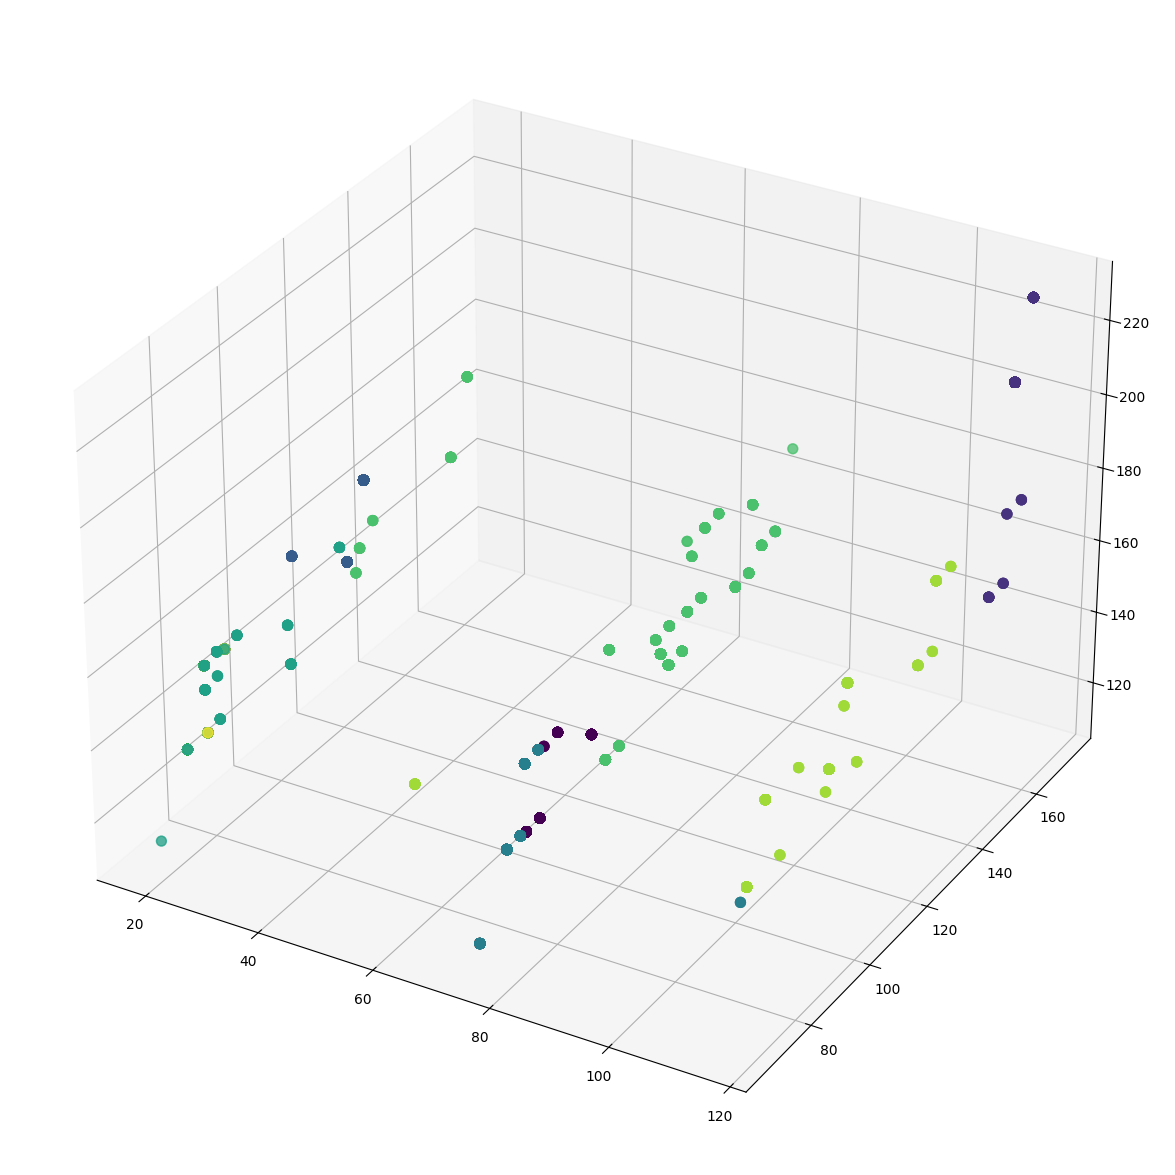

In [3]:
kmeans = KMeans(n_clusters=8).fit(df_cluster)
centroids = kmeans.cluster_centers_
print(centroids)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster['time5'], df_cluster['time8'], df_cluster['time12'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#pd.plotting.scatter_matrix(df_cluster, alpha=0.2, c=kmeans.labels_.astype(float), figsize=(15,15))
#plt.show()
# Matplotlib toolkits
# PCA
# Agglomeratives Clustern

In [ ]:


pca = PCA(n_components = 4 )
pca.fit(df_cluster)
df_pca = pca.transform(df_cluster)
df_pca = pd.DataFrame(df_pca, columns = ['P1', 'P2', 'P3', 'P4']) 
print(pca.score)


In [ ]:
pca.explained_variance_ratio_

In [ ]:
# Visualization before clustering

plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:

plt.figure(figsize = (10,7))
plt.title('Dendrograms')
plt.axhline(y=3, color='r', linestyle='--')
dend = sch.dendrogram(sch.linkage(df_pca, method='ward'))

In [ ]:
model = AgglomerativeClustering(n_clusters = 6)

y_means = model.fit_predict(df_pca)

In [ ]:


silhouette = silhouette_score(df_pca, y_means)
print('Silhouette Score: ', silhouette )

davies_bouldin = davies_bouldin_score(df_pca, y_means)
print('Davies Bouldin Score: ', davies_bouldin )



In [ ]:
# Visualization of the result

plt.figure(figsize=(10, 8))

plt.title('Agglomerative Clustering with 6 Clusters')

plt.scatter(df_pca.P1, df_pca.P2, c=y_means, s=100)

In [53]:
path="./cluster_models/"
n_cluster = 8

if os.path.exists(path+"kmeans_model_n"+str(n_cluster)+".pkl"):
            with open(path+"kmeans_model_n"+str(n_cluster)+".pkl", "rb") as f:
                kmeans = pickle.load(f)

GA_SOLUTIONS_PATH = "IsriDataDict.pkl"

isri_dataset = pickle.load(open(GA_SOLUTIONS_PATH, 'rb'))




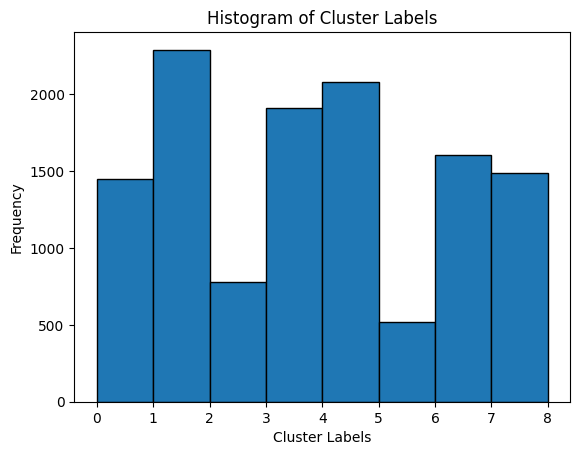

In [104]:
kmeans = KMeans(n_clusters=8).fit(df_cluster)

all_labels = []
for test_id in range(606):
    times_array = [j['times'] for j in isri_dataset.data['Jobdata'][test_id].values()]

    labels = kmeans.predict(times_array)
    all_labels.append(labels)
all_labels = np.array(all_labels).flatten()
plt.hist(all_labels, bins=np.arange(9), edgecolor='black')
plt.xticks(np.arange(9))  # Set x-axis labels from 0 to 8
plt.xlabel('Cluster Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Labels')
plt.show()

[[98.46,
  93.48,
  72.78,
  0.0,
  20.7,
  88.68,
  68.94,
  80.76,
  79.08000000000001,
  98.58,
  58.379999999999995,
  148.37999999999997],
 [98.46,
  93.48,
  72.78,
  0.0,
  18.36,
  92.10000000000001,
  68.94,
  75.0,
  77.22,
  98.58,
  75.66,
  131.27999999999997],
 [111.06,
  101.22,
  69.90000000000002,
  90.84000000000003,
  113.16000000000001,
  88.68,
  68.94,
  82.74000000000001,
  104.58,
  103.98,
  78.89999999999999,
  158.09999999999997],
 [98.46,
  93.48,
  72.78,
  0.0,
  18.36,
  92.10000000000001,
  68.94,
  75.0,
  77.22,
  98.58,
  75.66,
  131.27999999999997],
 [101.52,
  93.48,
  72.78,
  0.0,
  74.16000000000001,
  92.10000000000001,
  68.94,
  75.0,
  77.22,
  98.58,
  78.89999999999999,
  131.27999999999997],
 [110.69999999999999,
  316.44000000000005,
  72.78,
  0.0,
  18.36,
  92.10000000000001,
  68.94,
  75.0,
  77.22,
  98.58,
  88.61999999999999,
  131.27999999999997],
 [98.46,
  93.48,
  72.78,
  0.0,
  18.36,
  92.10000000000001,
  68.94,
  75.0,
 